In [25]:
import numpy as np
import pandas as pd
from utilss import *
import copy
import math
%matplotlib inline

In [26]:
# def load_data(filename):
#     data = np.loadtxt(filename, delimiter=',')
#     X = data[:,:2]
#     y = data[:,2]
#     return X, y

def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y
    

In [27]:
# def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
#     positive = y == 1
#     negative = y == 0
    
#     # Plot examples
#     plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
#     plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

# def plot_data(X, y, pos_label = "y=1", neg_label = "y=0")
#     postive = y == 1
#     negative = y == 0

#     plt.plot(X[postive, ])

In [28]:
X_train, y_train = load_data("data/ex2data1.txt")

In [29]:
print("5 elements:/n", X_train[:5])
print("5 elements:/n", y_train[:5])

print("Type of X_train: ", type(X_train))
print("Type y_train: ", type(y_train))

5 elements:/n [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
5 elements:/n [0. 0. 0. 1. 1.]
Type of X_train:  <class 'numpy.ndarray'>
Type y_train:  <class 'numpy.ndarray'>


In [30]:
print('X_train shape: ', X_train.shape ,y_train.shape)
print('we have m = %d traommg examples' %  (len(X_train)))

X_train shape:  (100, 2) (100,)
we have m = 100 traommg examples


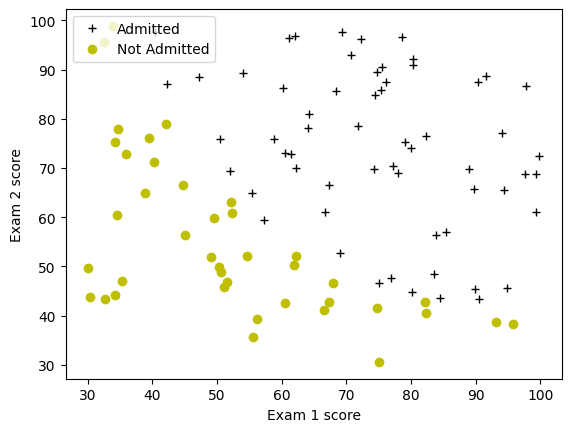

In [31]:
plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not Admitted")

plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc="upper left")
plt.show()

In [32]:
def sigmoid(z):

    # z = np.dot(w,X) + b
    g = 1 / (1 + np.exp(-z))

    

    return g

In [33]:
test = np.array([-1,0,1,2])
print("sigmoid(0) = ", sigmoid(test))

from public_tests import *
sigmoid_test(sigmoid)

sigmoid(0) =  [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


In [34]:
# def compute_cost(X,y,w,b, lambda_=1):

#     m,n = X.shape
#     loss_sum = 0
 

#     for i in range(m):
#         z_wb = 0
#         for j in range(n):
#             z_wb_ij = w[j] * X[i][j]
#             z_wb += z_wb_ij
#         z_wb += b
#         f_wb = sigmoid(z_wb)
#         loss = -y[i] *np.log(f_wb) - (1-y[i]) * np.log(1- f_wb) 
#         loss_sum += loss



#     total_cost = (1 / m) * loss_sum
#     return total_cost

In [35]:
def compute_cost(X,y,w,b , lambda_=1):
    m,n = X.shape

    loss_sum = 0
    for i in range(m):
        z_wb = np.dot(X[i],w) + b
        f_wb = sigmoid(z_wb)
        loss_sum += -y[i] *np.log(f_wb) - (1-y[i]) * np.log(1- f_wb) 
    total_cost = loss_sum / m

    return total_cost
    




In [36]:
m,n = X_train.shape

initial_w = np.zeros(n)
initial_b = 0. 
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at w (zeros) {:.3f}'.format(cost))

Cost at w (zeros) 0.693


In [37]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))

compute_cost_test(compute_cost)

Cost at test w,b: 0.218
All tests passed!


In [38]:
def compute_gradient(X, y, w, b, lambda_=None):
    m,n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):

        z_wb = 0

        for j in range(n):
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij

        z_wb += b
        f_wb = sigmoid(z_wb)


        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i 

        for j in range(n):

            dj_dw_ij = (f_wb - y[i]) * X[i, j]
            dj_dw[j] += dj_dw_ij

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return  dj_db ,dj_dw




In [39]:
# def compute_gradient(X,y,w,b , lamda_ = None) :
    
#     m,n - X.shape
#     dj_dw = np.zeros(w.shape)
#     dj_db = 0.
    
#     for i in range(m):
#         z_wb = sigmoid(np.dot(w,X[i]) + b)
#         f_wb = z_wb
#         err_i  = f_wb_i  - y[i]                       
#                 for j in range(n):
#                     dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
#                 dj_db = dj_db + err_i
#             dj_dw = dj_dw/m                                   
#             dj_db = dj_db/m     

# return  dj_db ,dj_dw




In [40]:
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db initial:{dj_db} ')
print(f'dj_dw initial:{dj_dw.tolist()} ' )

dj_db initial:-0.1 
dj_dw initial:[-12.00921658929115, -11.262842205513591] 


In [41]:
test_w = np.array([0.2, -0.5])
test_b = -24
dj_db, dj_wb = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w: ', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

compute_gradient_test(compute_gradient)


dj_db at test_w:  -0.5999999999991071
dj_dw at test_w: [-12.00921658929115, -11.262842205513591]
All tests passed!


In [46]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(X)

    J_history = []
    w_history = []

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        w_in = w_in - alpha * dj_dw
        b_in = b_in -  alpha * dj_db

        if i<100000:
            cost = cost_function(X,y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i% math.ceil(num_iters) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")
    return w_in, b_in, J_history, w_history

        

In [47]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8

iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations, 0)

iteration    0: Cost     0.96 
iteration 9999: Cost     0.30 


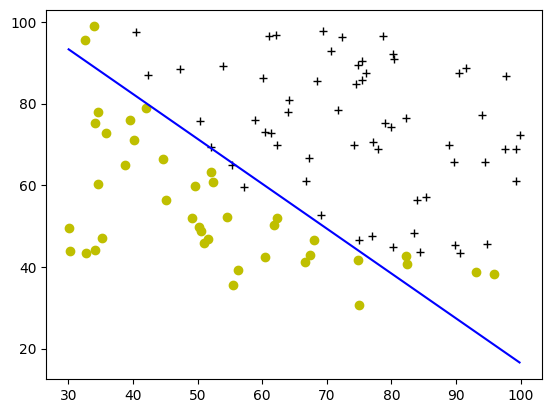

In [48]:
plot_decision_boundary(w,b,X_train, y_train)

In [64]:
def predict(X,w,b):
    m,n = X.shape
    p = np.zeros(m)

    for i in range(m):
        z_wb = 0
        z_wb += np.dot(w,X[i]) + b
        f_wb = sigmoid(z_wb)
        p[i] = 1 if f_wb > 0.5 else 0
    return p




In [68]:
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3
tmp_X = np.random.rand(4,2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output predict: shape {tmp_p.shape}, value {tmp_p}')

predict_test(predict)

Output predict: shape (4,), value [0. 0. 0. 1.]
All tests passed!


In [71]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

ValueError: shapes (2,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [72]:
X_train, y_train = load_data("data/ex2data2.txt")

In [74]:
print("X_train:", X_train[:5])
print("X_train type:", type(X_train))
print("y_train:", type(y_train))

print("Y_train:", y_train[:5])

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
X_train type: <class 'numpy.ndarray'>
y_train: <class 'numpy.ndarray'>
Y_train: [1. 1. 1. 1. 1.]


In [75]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("We have m = %d training examples" %(len(y_train)))

X_train shape:  (118, 2)
y_train shape:  (118,)
We have m = 118 training examples


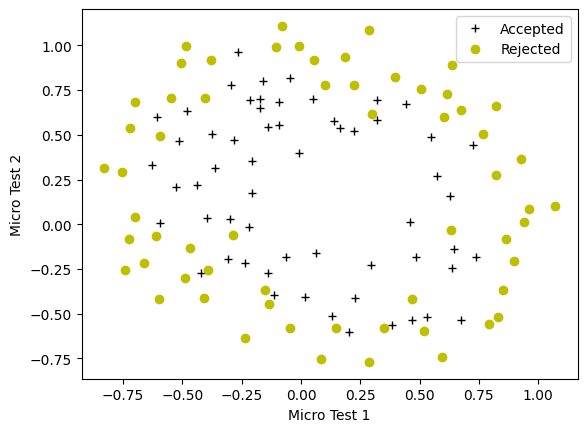

In [79]:
plot_data(X_train, y_train, pos_label="Accepted", neg_label="Rejected")

plt.ylabel("Micro Test 2")
plt.xlabel("Micro Test 1")
plt.legend(loc="upper right")
plt.show()

In [82]:
print(" Original shape: ", X_train.shape)

mapped_X = map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping: ", mapped_X.shape)
print(mapped_X)

 Original shape:  (118, 2)
Shape after feature mapping:  (118, 27)
[[ 5.12670000e-02  6.99560000e-01  2.62830529e-03 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [-9.27420000e-02  6.84940000e-01  8.60107856e-03 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [-2.13710000e-01  6.92250000e-01  4.56719641e-02 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [-4.84450000e-01  9.99270000e-01  2.34691802e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [-6.33640000e-03  9.99270000e-01  4.01499650e-05 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 6.32650000e-01 -3.06120000e-02  4.00246023e-01 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


In [86]:
print("X_train: ",X_train[0])
print("mapped_X: ", mapped_X)

X_train:  [0.051267 0.69956 ]
mapped_X:  [[ 5.12670000e-02  6.99560000e-01  2.62830529e-03 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [-9.27420000e-02  6.84940000e-01  8.60107856e-03 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [-2.13710000e-01  6.92250000e-01  4.56719641e-02 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [-4.84450000e-01  9.99270000e-01  2.34691802e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [-6.33640000e-03  9.99270000e-01  4.01499650e-05 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 6.32650000e-01 -3.06120000e-02  4.00246023e-01 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


In [105]:
def compute_cost_reg(X,y,w,b, lambda_ = 1):
    m,n = X.shape

    cost_without_reg = compute_cost(X, y, w, b)
    reg_cost = 0

    for j in range(n):
        reg_cost_j =  w[j] ** 2
        reg_cost += reg_cost_j

    # for i in range(m):
    #     z_wb = 0
    #     z_wb = np.dot(w,X[i] + b)
    #     f_wb = sigmoid(z_wb)
    #     reg_cost += -y[i] *np.log(f_wb) - (1-y[i]) * np.log(1- f_wb) 
    total_cost = cost_without_reg + (lambda_/ (2 * m)) * reg_cost
    return total_cost

In [106]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[-1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost: ", cost)

compute_cost_reg_test(compute_cost_reg)

Regularized cost:  0.6618252552483948
All tests passed!


In [113]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1):

    m, n = X.shape

    dj_db, dj_dw = compute_gradient(X,y,w,b)

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_ / m ) * w[j]
        # dj_dw += dj_dw[j] 
    
    return dj_db, dj_dw

In [114]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"dj_dw: {dj_dw[:4]}" , )

dj_db: 0.07138288792343662
dj_dw: [-0.01038603  0.01140985  0.05362735  0.00314028]


In [ ]:
np.random.seed(1)
initial